In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math


In [2]:
data= pd.read_csv("data.csv")
data = data.drop(0)
thorshavn = data[data["station"]=="thorshavn"].reset_index().drop("index",axis=1)
stornoway = data[data["station"]=="stornoway"].reset_index().drop("index",axis=1)
leuchars = data[data["station"]=="Leuchars"].reset_index().drop("index",axis=1)
liverpool = data[data["station"]=="Liverpool"].reset_index().drop("index",axis=1)
crawley = data[data["station"]=="Crawley"].reset_index().drop("index",axis=1)
trappes = data[data["station"]=="Trappes"].reset_index().drop("index",axis=1)
nimes = data[data["station"]=="Nimes"].reset_index().drop("index",axis=1)

locations = [thorshavn,stornoway,leuchars,liverpool,crawley,trappes,nimes]

In [3]:
data.head()
leuchars

,Pressure,Temperature,Mixing Ratio,Wet-bulb Potential Temperature,West-East wind speed component,station,Trop
0,1000,0,3,-1,7,Leuchars,410
1,850,-8.8,1.7,-1.2,12,Leuchars,410
2,700,-21.1,0.2,-1.2,21,Leuchars,410
3,500,-37.2,0.15,1.5,30,Leuchars,410
4,400,-45.7,0.09,5.3,50,Leuchars,410
5,350,-48,-,9,55,Leuchars,410
6,300,-50,-,14,62,Leuchars,410
7,200,-48.1,-,24.1,54,Leuchars,410


In [4]:
def graph(locations,data,x,y,trop=True):
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(5)
    for loc in locations:
        name = loc["station"][0]
        loc[y] = loc[y].apply(float)
        loc[x] = pd.to_numeric(loc[x],errors='coerce')
        data[x]=pd.to_numeric(data[x],errors='coerce')
        logscale = np.log10(loc[y].apply(float))
        plt.plot(loc[x],logscale,label=name)
        if trop:
            lab = name + " Tropopause"
            loc["Trop"] = pd.to_numeric(loc["Trop"],errors='coerce')
            logTrop = math.log10(loc["Trop"][1])
            plt.plot(data[x].min()-1,logTrop,"o",label=lab)

        plt.gca().invert_yaxis()
        yrange = np.log10(np.arange(200,1100,100))
        plt.yticks(yrange,np.arange(200,1100,100))
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f"{y} against {x}")
        xdiff = (((data[x].max()-data[x].min())//1)/10)+1
        xrange = np.arange(data[x].min(),data[x].max()+1,xdiff)
        plt.xticks(xrange)
        plt.legend()
        plt.grid()
    
    plt.show()

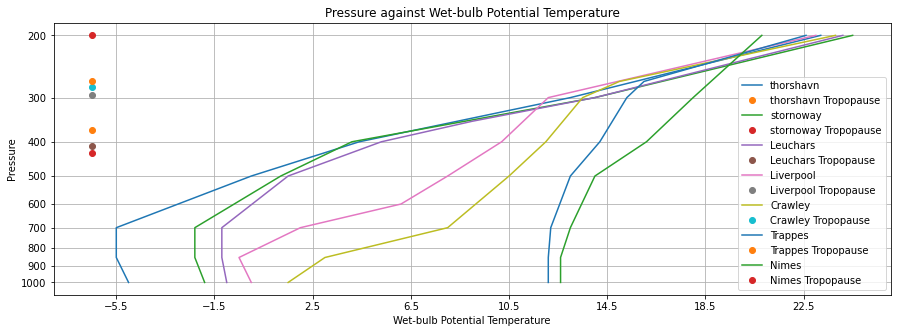

In [5]:
graph(locations,data, "Wet-bulb Potential Temperature","Pressure")

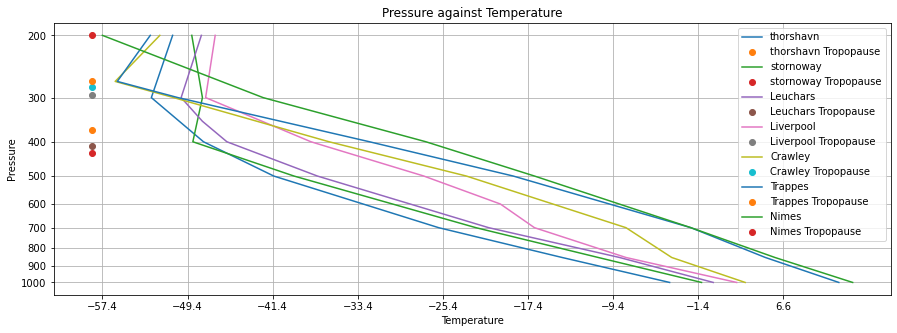

In [6]:
graph(locations,data, "Temperature","Pressure")

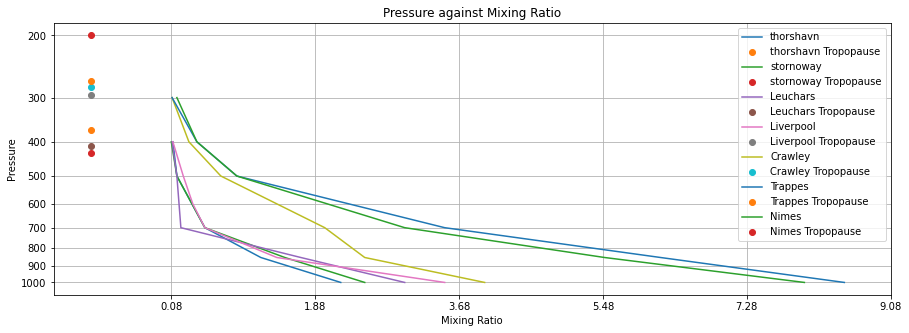

In [7]:
graph(locations,data, "Mixing Ratio","Pressure")